## single-shot object detection with enriched semantics

丰富检测对象的语义特征，通过使用语义分割分支和全局激活模块

该语义分割的分支不需要额外的注释，就使用弱的语义分割ground truth.通过使用全局激活模块，以自我监督的方式学习通道与对象类别之间的关系。

较小物体由低层检测，较大物体由高层检测。但是，在较低层中，一般只有较低级的特征，即只能捕捉到基本的视觉模式，而没有强大的语义信息。

由此引出两个问题：
               （１）小物体可能就检测不到；
               
               [我想说，这里怎么理解比较好？这个问题引出的不直观]（２）高层特征的质量被低层不完美的特征所破坏。

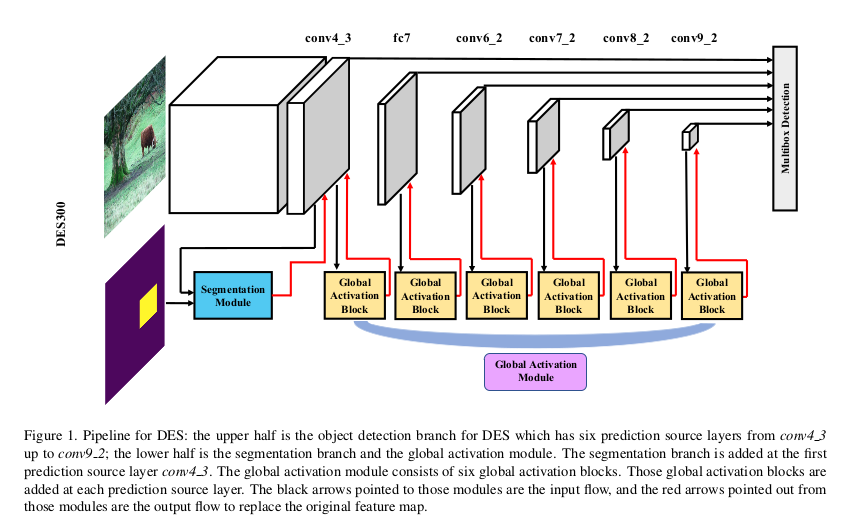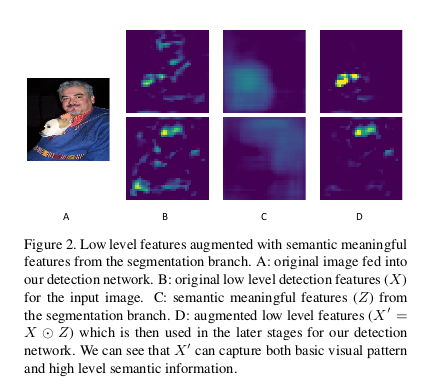
图一

the segmentation branch is added at the first prediction source layer conv4_3.
the flobal activation module consists of six global activation blocks.

our method uses segmentation features to activate(这里的activate怎么理解？) the detection features.

### Proposed method

在前边层已经学到了语义信息，所以在后边的层就不需要对他们使用语义分割了。而且在高层上，由于分辨率较小，所以在他们上边进行语义分割就会很困难。所以使用了global activation blocks,用自监督管理来增强语义信息。

### semantic enrichment at low level layer

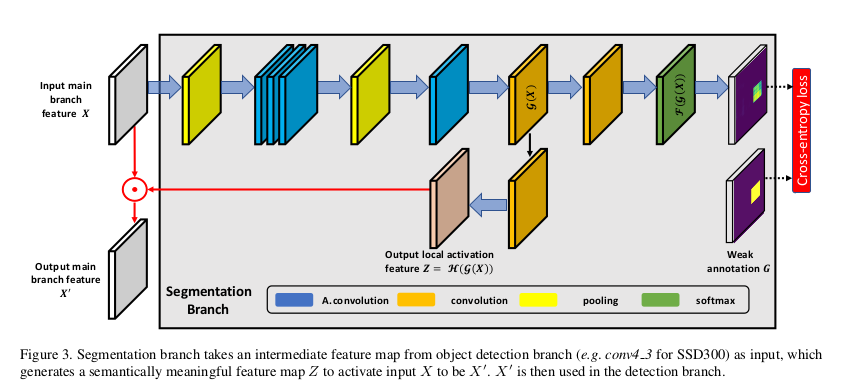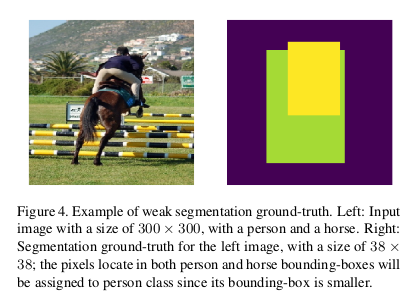

使用conv4_3这样低的卷积层和bounding box level级别的语义分割标注，作为输入，然后生成一个同样大小的，具有语义特征的的特征图。

再将conv4_3得到的特征与得到的同样维度的具有语义特征的特征图进行逐元素相乘，从而将之前得到的特征图进行激活。

$ X = R^{C*H*W} $表示conv４_3该层的预测。

$ G = \{0,1,2,3,...,N\}^{H*W} $ 表示每一个区域具体的ground truth,其中N表示检测的类别数。

使用$ Y = R^{(N+1)}*H*W $作为对该特征图上，每一个像素点属于具体哪一个类别的预测结果


对于语义分割这一支，将conv4_3的特征图输入，然后得到一个同维度同大小的conv4_3',来代替原来的特征图。

将特征图输入之后，先后进过一个pooling,三个空洞卷积，一个pooling,一个空洞卷积，这样得到了G(X), 这是一个中间结果，在这里分为两支，一支再经过一个１＊１的卷积，最后进过softmax对每一个像素点进行预测。另一支通过一个1×1的网络，直接得到局部激活特征图，用这个得到的特征图来同原始的特征图进行逐元素相乘，得到激活后的特征图。

使用弱的语义标注，是根据bounding box来生成语义分割的标注，对于图像上的每一个pixel，如果位于一个bounding box中，就直接标记为这个bounding box的类别，如果这个像素位于多个bounding box中，就取面积最小的bounding box的类别，如果没有位于任何一个bounding box中，那么就标记位背景。


### semantic enrichment at higher level layer

通过使用全局激活模块，以自我监督的方式学习通道与对象类别之间的关系。　by eliminating the spatial information(??怎么回事？说这句话有道理吗？)　self-supervied manner?(什么意思？)


一共经历３个阶段，
(1)spatial pooling
(2)channel-wise learning
(3)broadcasted mlulti-plying

Squeeze-and-Excitation Networks 这篇论文也要看，这里的这个部分，就相当于用人家的思想，在具体VGG上进行了实现。然后说效果比较好。现在的理解是这样的。



### multi-task training

$$ L_{seg}(I,G)=-\frac{1}{H*W}\sum_{h,w}log(Y_{G_{h,w},h,w})  $$

$$ L(I,B,G)=L_{det}(I,B) + \alpha L_{seg}(I,G) $$

其中 $\alpha$ 用来平衡两个任务

### 实验部分

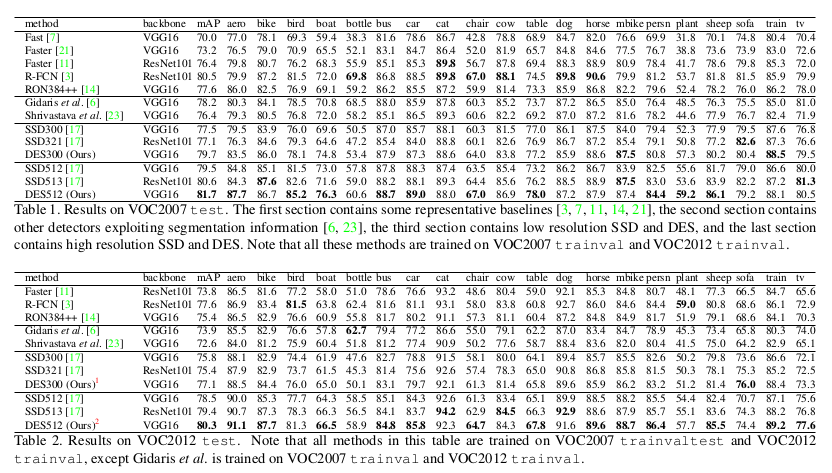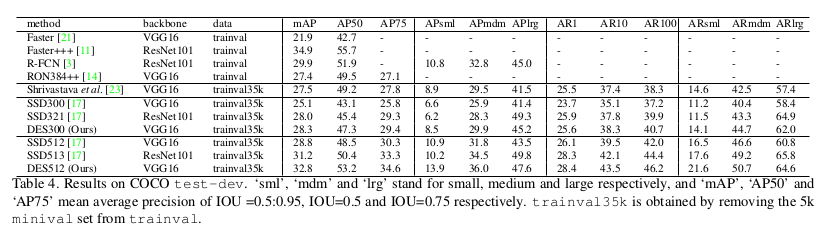

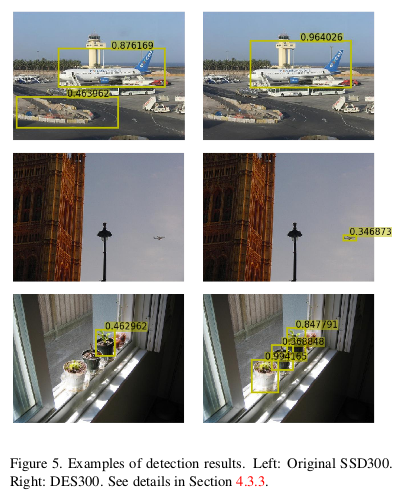

"""


"""

交叉熵损失函数　：https://blog.csdn.net/u012162613/article/details/44239919

输入变量与输出变量均为连续变量的预测问题是回归问题；
输出变量为有限个离散变量的预测问题成为分类问题；
输入变量与输出变量均为变量序列的预测问题成为标注问题。